# Simple implementation of gradient descent

Play around with this code to visualize the effect of the various parameters (e.g. $\beta$ and $T$) on the convergence of gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mline

In [2]:
# Define the objective, its gradient, and the solvers

D = np.diag([2,50])

def f(x):
    return 1/2*np.linalg.norm(D @ x)**2

def df(x):
    return D @ D @ x

def gd(df, x0, beta, T):
    xhist=[x0]
    for t in np.arange(1,T+1):
        prevx = xhist[-1]
        stepsize = 1/beta
        xhist.append(prevx - stepsize * df(prevx))
    return xhist

In [3]:
x0 = np.array([5,4])
gdxhist = gd(df, x0, beta=2500, T=41*2500)
gdxhist = np.array(gdxhist)

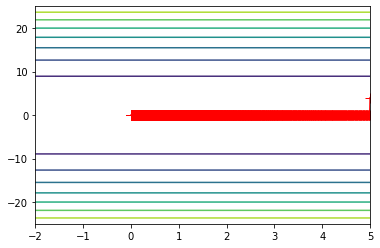

In [4]:
# Plot the contours of f and the history of the point estimates

xrange = np.linspace(-2,5)
yrange = np.linspace(-25,25)
X,Y = np.meshgrid(xrange, yrange)
Z = np.array([z for z in map(f, zip(X.flatten(), Y.flatten()))])
Z = Z.reshape(X.shape)
gdlines = mline.Line2D(gdxhist[:,0], gdxhist[:,1], color='red', marker='+', markersize=10)

fig, ax = plt.subplots()
ax.contour(X,Y,Z)
transform = ax.transAxes
ax.add_line(gdlines)
plt.show()